In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Packages / libraries
import os

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [178]:
# preprocessing and modeling
import itertools
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [68]:
sensor = pd.read_csv("sensor.csv")

In [69]:
sensor.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [70]:
sensor.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [71]:
sensor.drop('Unnamed: 0', inplace = True, axis = 1)

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64


<AxesSubplot:xlabel='machine_status', ylabel='count'>

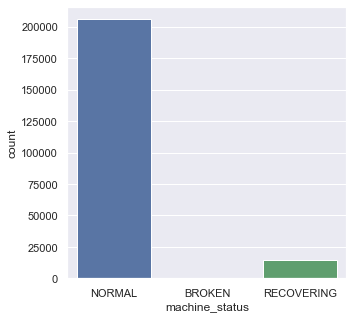

In [72]:
print(sensor.machine_status.value_counts())

sns.countplot(sensor.machine_status)

In [73]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [74]:
# timestamp column to datetime
sensor["timestamp"] = pd.to_datetime(sensor.timestamp)

In [75]:
#empty values in percent
sensor.isnull().sum()/len(sensor)*100

#handle empty rows -> either mean or drop column if to many null values? (e.g. sensor_15)

timestamp           0.000000
sensor_00           4.633261
sensor_01           0.167484
sensor_02           0.008624
sensor_03           0.008624
sensor_04           0.008624
sensor_05           0.008624
sensor_06           2.177741
sensor_07           2.474129
sensor_08           2.317992
sensor_09           2.085603
sensor_10           0.008624
sensor_11           0.008624
sensor_12           0.008624
sensor_13           0.008624
sensor_14           0.009532
sensor_15         100.000000
sensor_16           0.014070
sensor_17           0.020879
sensor_18           0.020879
sensor_19           0.007262
sensor_20           0.007262
sensor_21           0.007262
sensor_22           0.018609
sensor_23           0.007262
sensor_24           0.007262
sensor_25           0.016340
sensor_26           0.009078
sensor_27           0.007262
sensor_28           0.007262
sensor_29           0.032680
sensor_30           0.118464
sensor_31           0.007262
sensor_32           0.030864
sensor_33     

<AxesSubplot:>

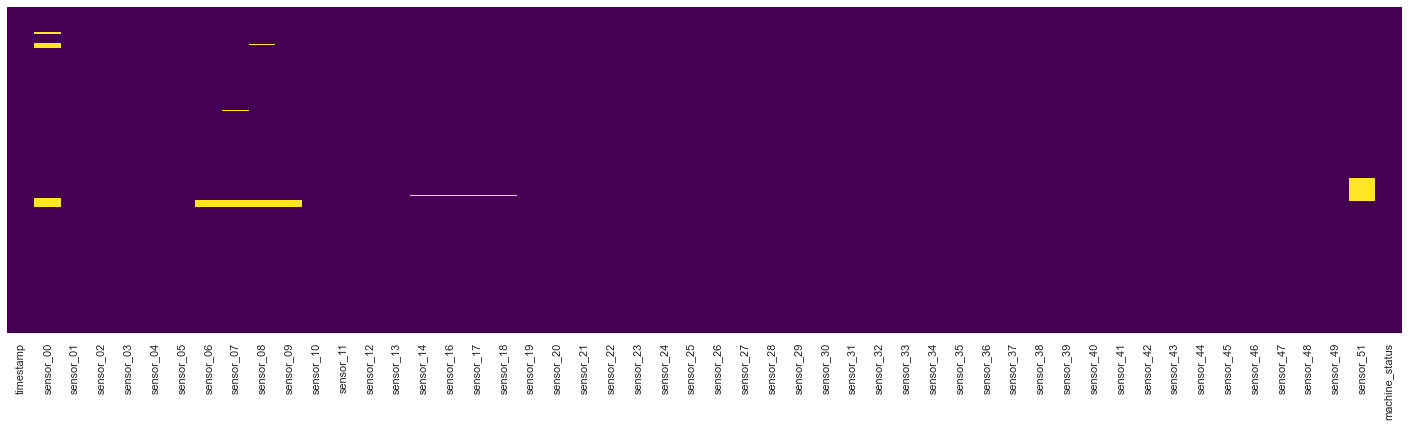

In [76]:
#check for nulls and deal with NaNs & update data types & feature engineering

#drop sensor 15 & 50
sensor.drop(["sensor_15", "sensor_50"], axis=1, inplace= True)


plt.figure(figsize=(25,6))
sns.heatmap(sensor.isnull(),yticklabels=False,cbar=False,cmap='viridis')


#fill empty rows with z-score

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64


[]

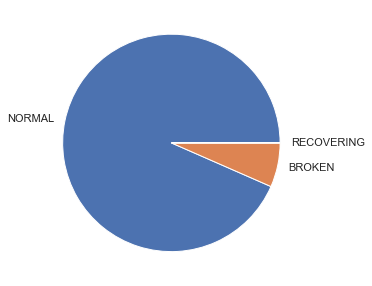

In [77]:
print(sensor.machine_status.value_counts())
plt.pie(x=sensor.machine_status.value_counts(), labels=sensor.machine_status.unique())
plt.plot()

In [78]:
sensor[sensor["machine_status"] == "BROKEN"]

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
17155,2018-04-12 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,16.869210,15.082470,35.530850,3.625588,1.602259,0.237091,407.4979,451.3286,449.1867,2.387357,652.2382,390.5987,858.3630,461.2751,955.74270,614.6786,653.9383,753.0676,570.81680,1161.1310,783.6125,710.6481,960.9374,742.2943,566.6204,261.7709,399.129100,301.1411,114.20790,52.08333,35.41666,87.23958,39.583330,36.979160,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,324.6528,BROKEN
24510,2018-04-18 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,14.185470,13.867190,28.304880,30.434710,21.437910,6.803444,420.0946,460.7847,457.7386,2.481055,664.2351,398.1912,879.1428,458.3324,944.30770,625.1230,650.4600,748.0622,502.59550,1063.0030,784.2626,671.2963,1016.6670,828.1685,578.9925,177.4708,411.165200,434.2556,73.31284,37.76041,32.81250,71.61458,28.645830,29.947916,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,183.7384,BROKEN
69318,2018-05-19 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,15.147570,14.793110,43.998860,43.623220,22.736040,9.277993,420.3359,463.0843,462.6495,2.539193,665.5446,399.1660,880.9252,498.6224,997.63640,619.0558,719.8438,867.5176,551.63670,1154.4050,761.1199,655.5555,1024.4790,849.8132,608.9143,171.3203,350.311700,285.3491,75.20248,47.39583,29.16667,66.66666,32.291660,31.250000,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,257.5231,BROKEN
77790,2018-05-25 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,15.943290,15.596060,27.092980,44.793620,32.745590,2.178048,420.7917,463.3876,464.5768,2.557975,665.4158,399.1982,885.1603,533.6134,982.50690,627.0386,746.0360,854.0722,478.34040,1095.9630,724.8124,698.6111,971.8749,882.1304,499.8158,171.7490,354.075700,250.9113,72.70645,381.77080,417.18750,427.34370,212.760400,176.822900,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,267.3611,BROKEN
128040,2018-06-28 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,15.183740,15.118630,2.002474,1.960537,0.000000,0.000000,197.9393,206.4634,193.7957,0.444666,108.9490,125.4787,158.0601,128.2272,96.38937,103.7937,143.1029,156.3189,21.31752,258.0632,109.4662,297.2222,575.0000,436.2560,258.6194,343.9342,694.479126,367.8615,23.78439,28.38542,22.13542,36.71875,23.177082,24.739580,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,NaN,BROKEN
141131,2018-07-08 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,0.036169,0.007234,25.977650,23.970270,19.995600,11.076400,421.6618,464.8507,470.9483,2.632338,669.1102,399.5446,880.8264,536.3282,1091.49300,628.2361,759.8998,946.8455,509.98580,1042.8290,562.6080,668.9814,1037.5000,947.3692,517.4770,287.9145,575.356500,616.8983,30.04753,48.69791,31.51042,39.32291,35.416660,32.812500,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,174.7685,BROKEN
166440,2018-07-25 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,15.697340,15.053530,36.717480,50.046190,30.742880,12.217860,420.8600,463.5181,455.2702,2.468381,665.9402,399.0930,880.8410,531.8727,1093.57900,626.4651,740.6738,981.4561,490.77280,1023.1660,551.2756,703.7037,971.8749,1013.3760,546.6656,363.0320,522.559400,812.8298,44.77601,50.00000,39.06250,102.86460,35.416660,36.458330,51.3

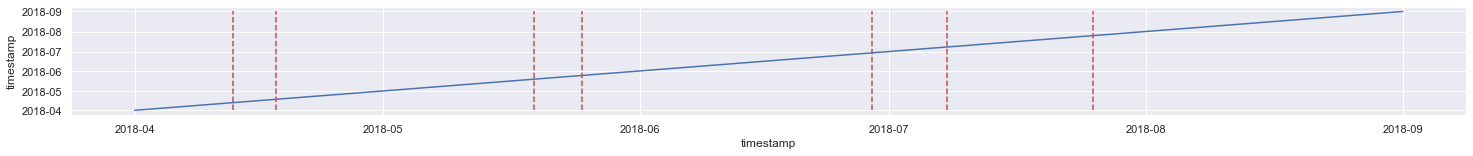

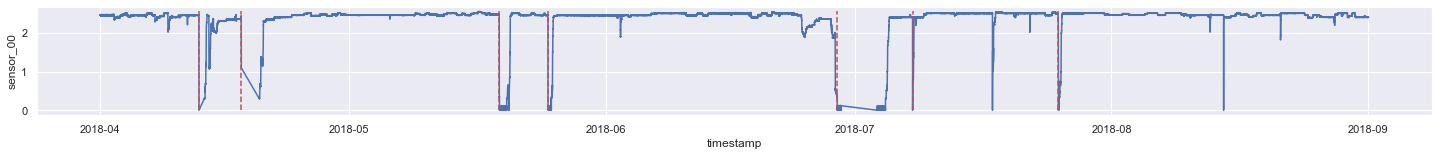

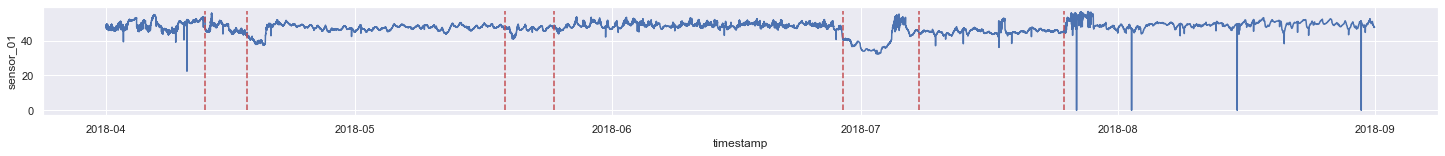

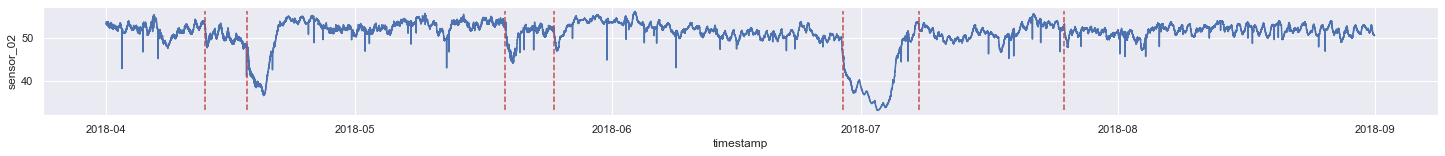

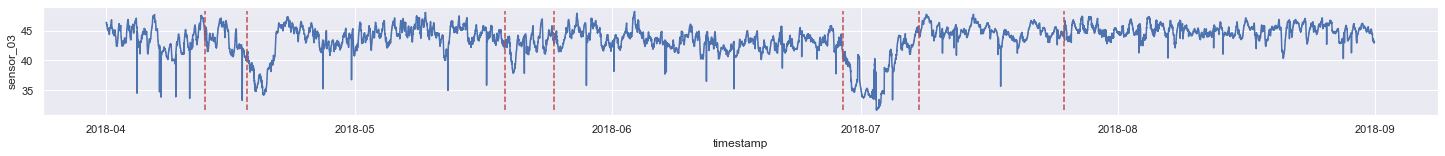

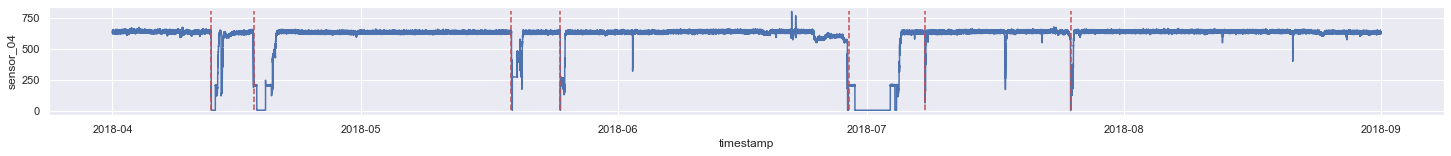

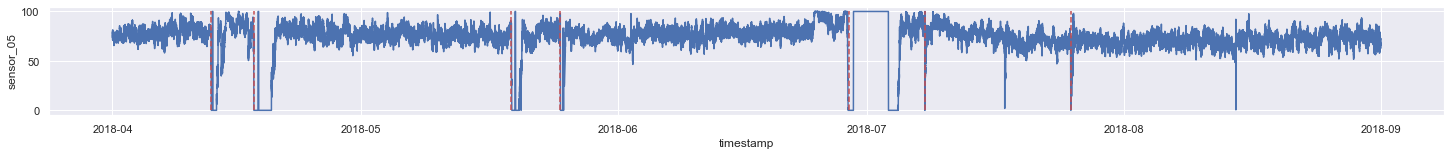

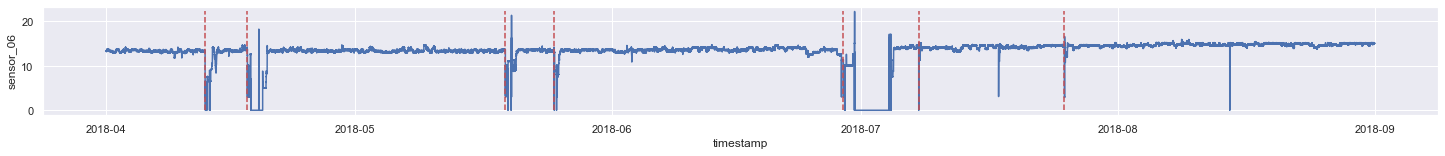

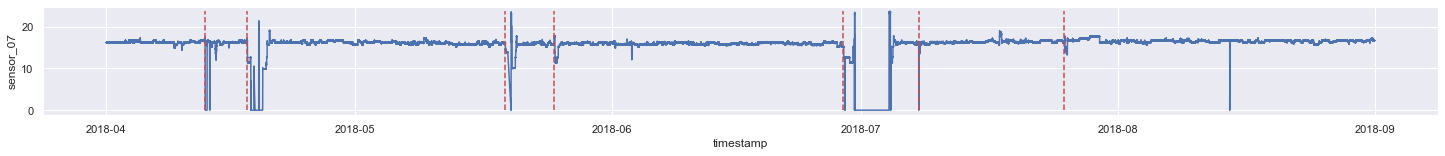

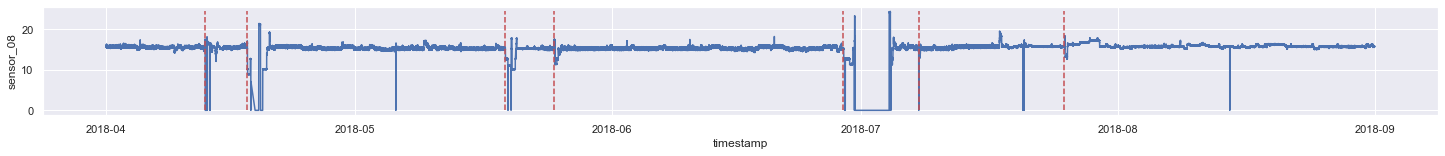

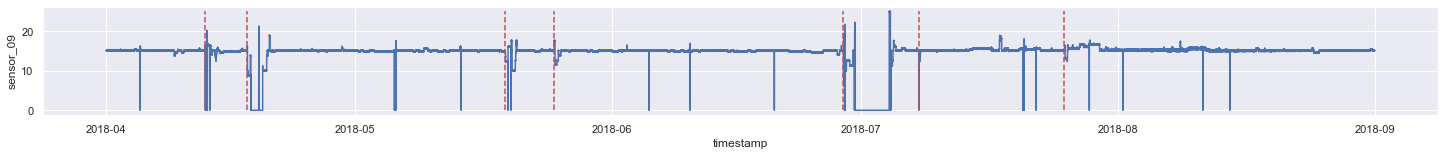

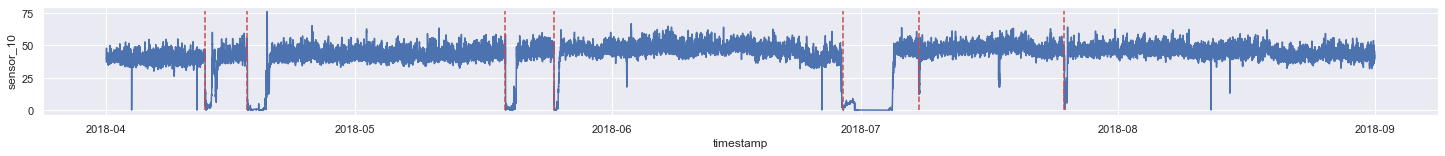

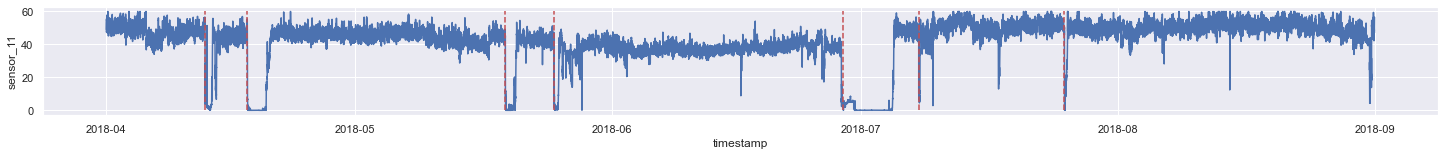

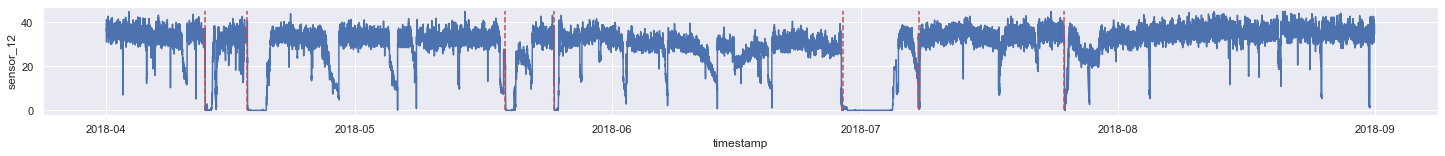

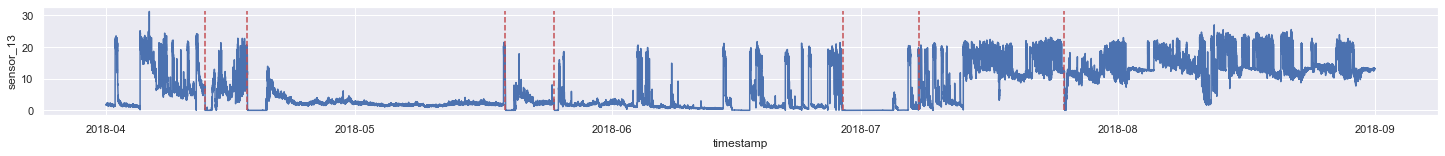

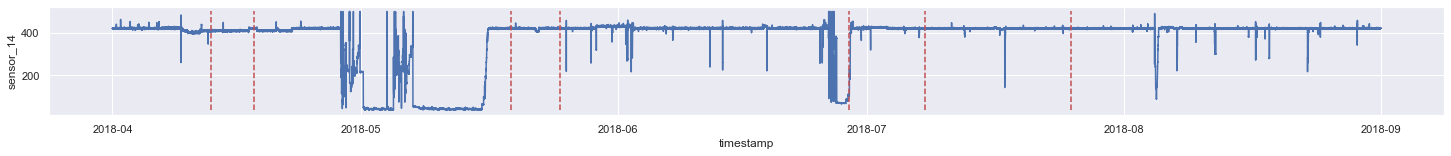

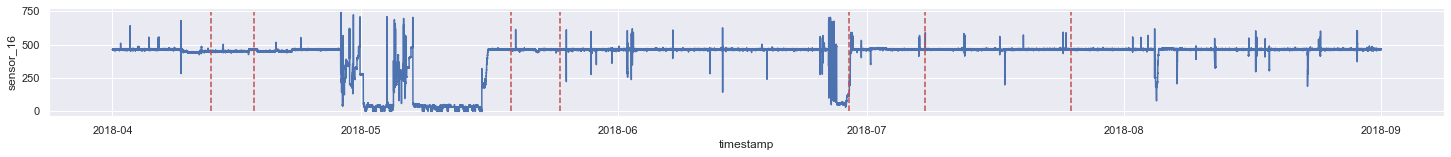

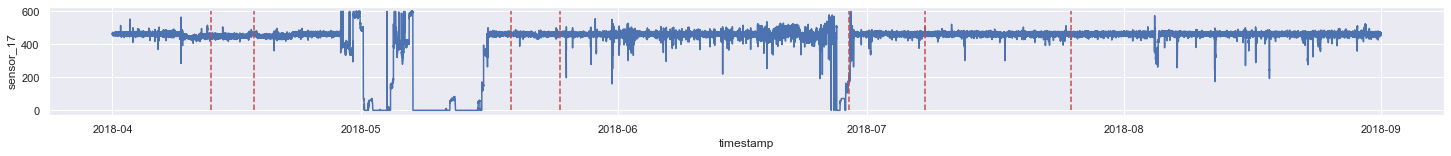

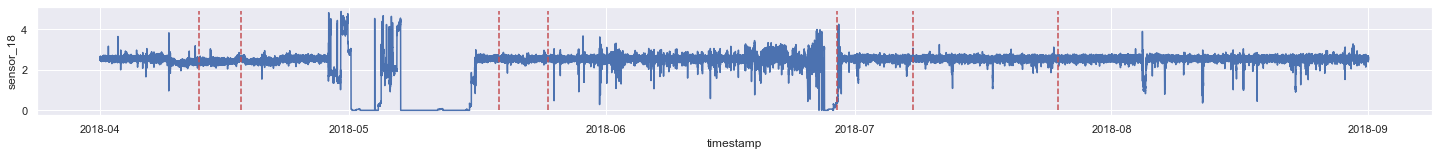

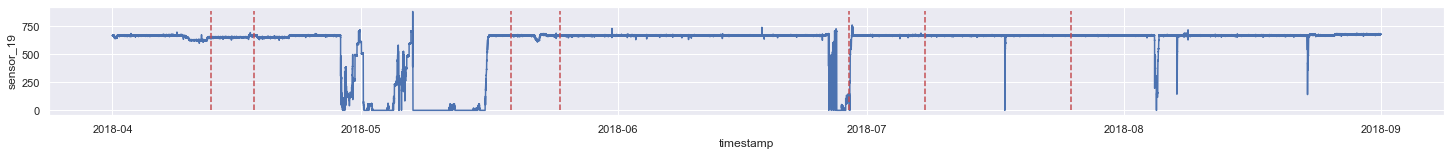

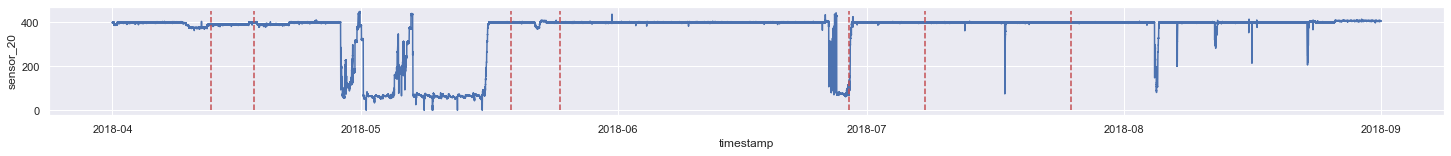

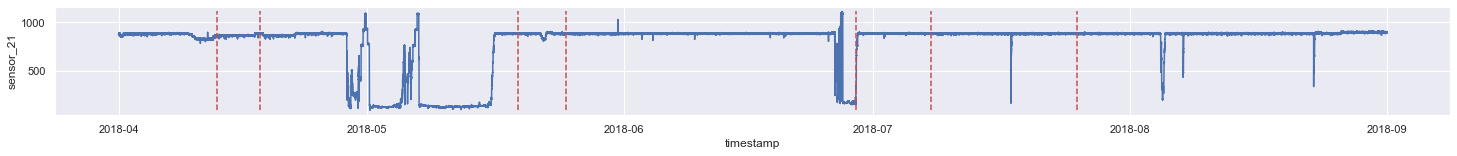

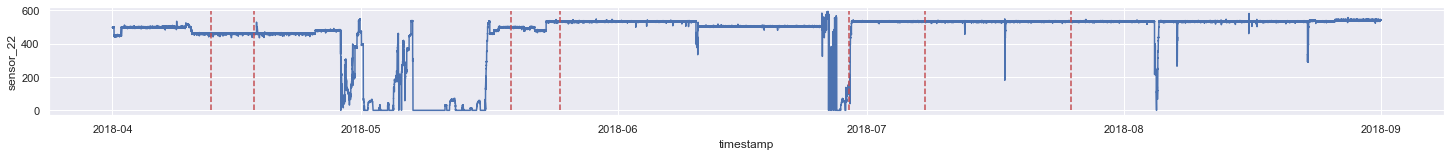

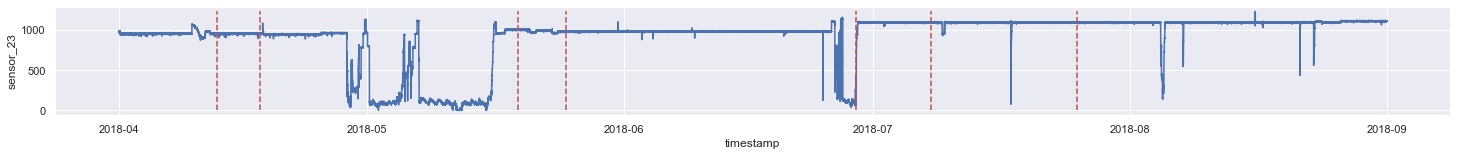

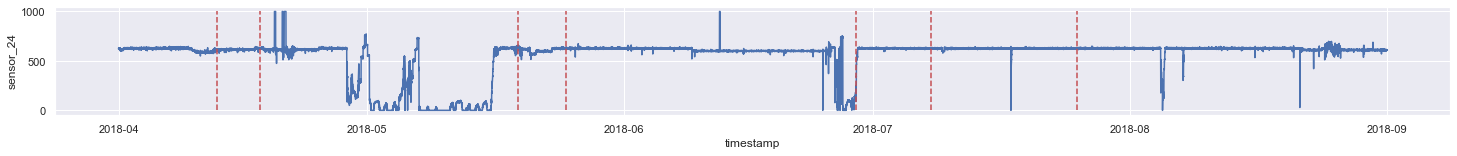

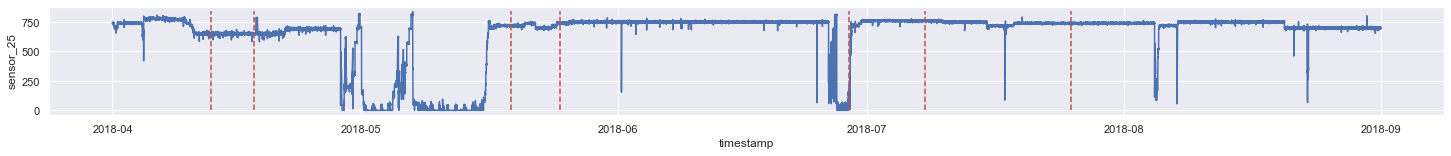

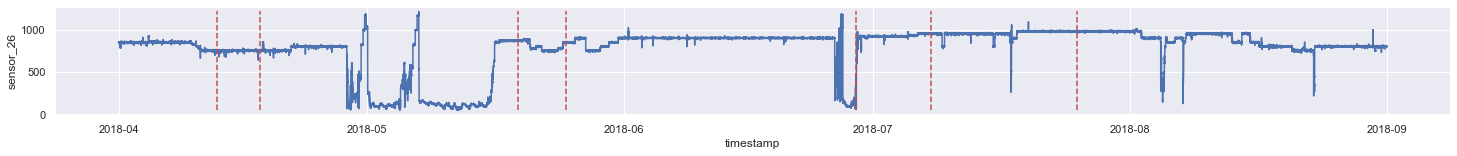

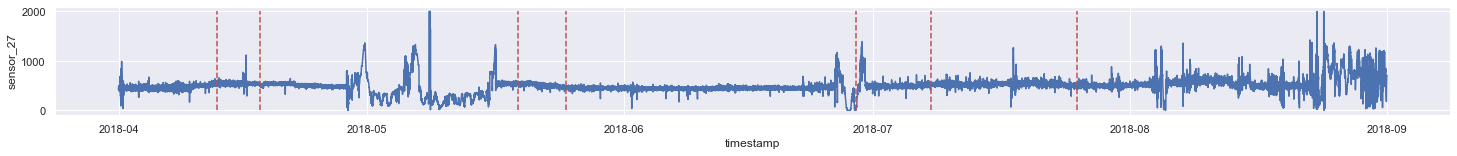

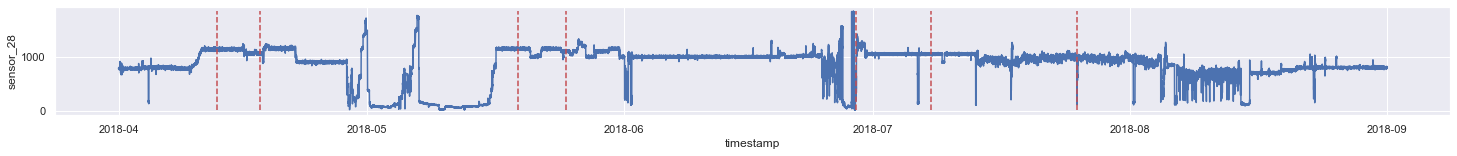

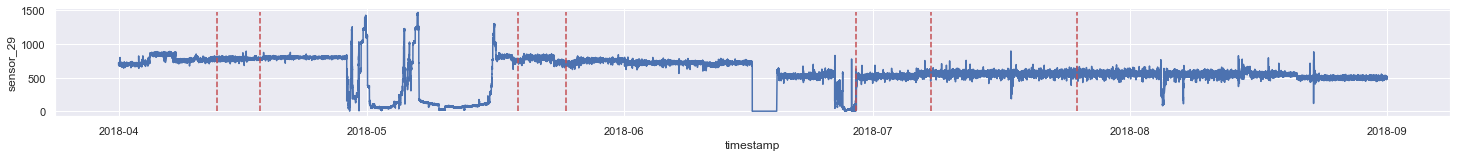

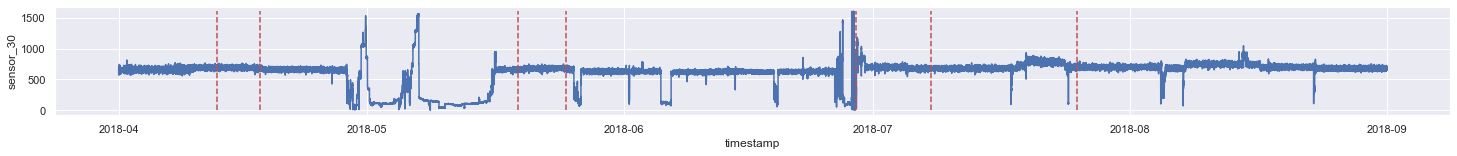

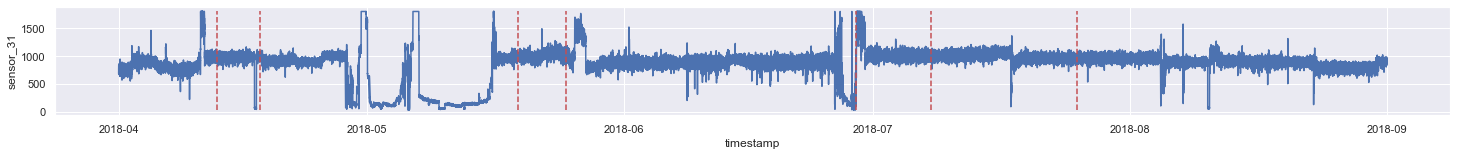

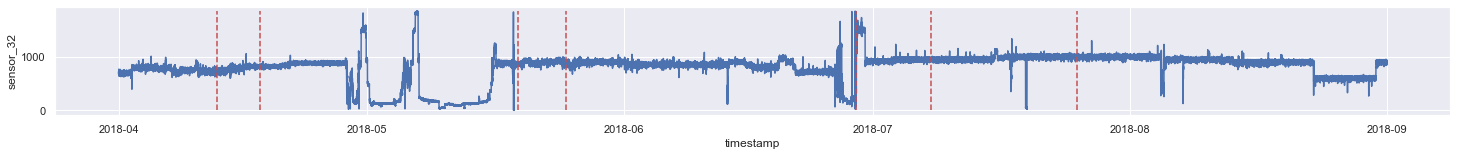

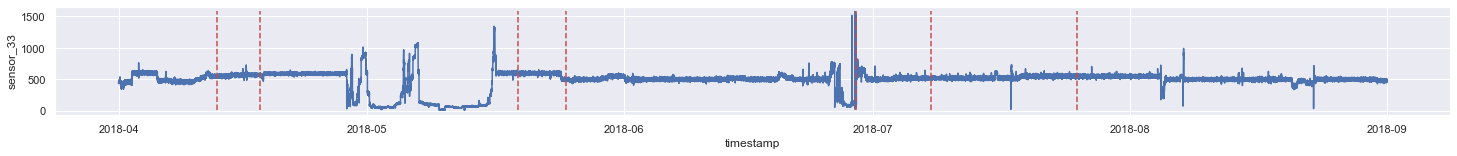

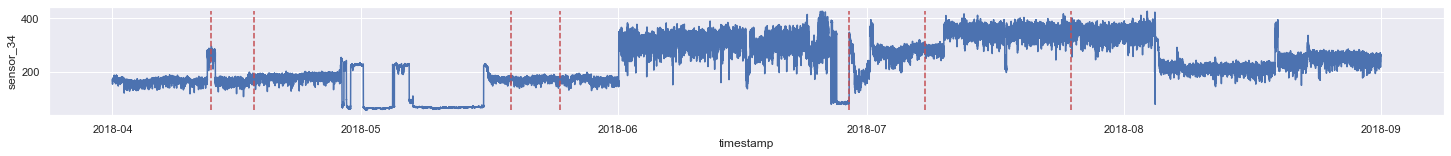

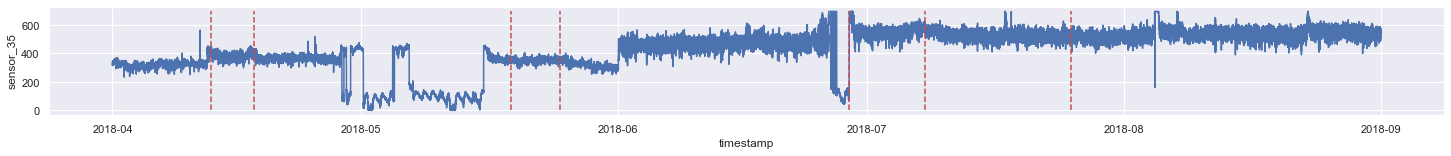

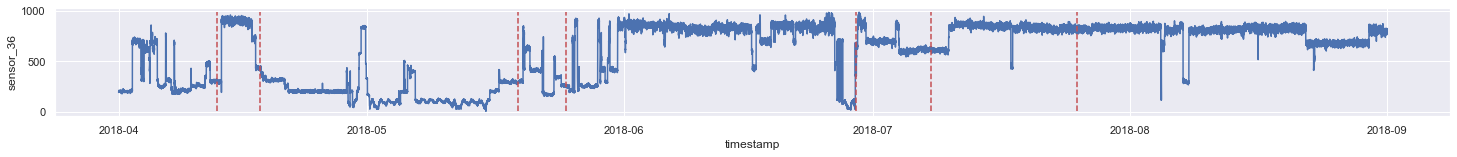

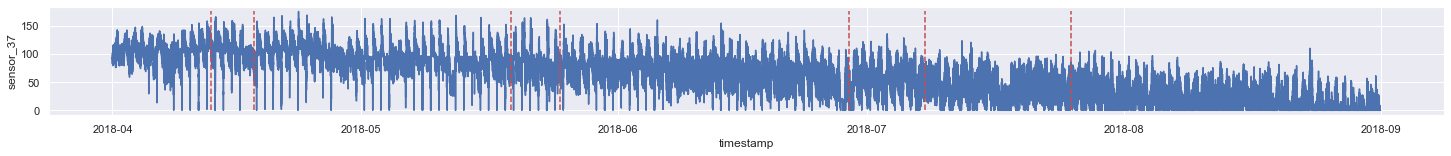

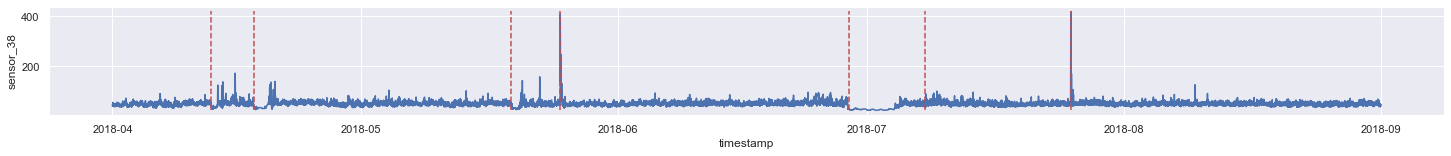

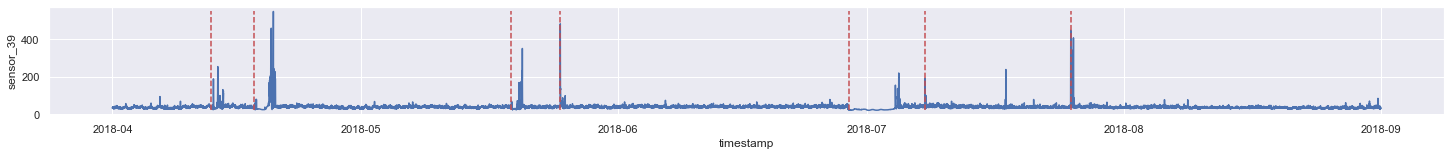

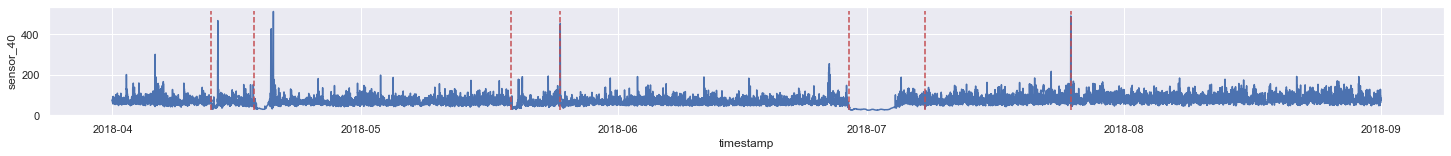

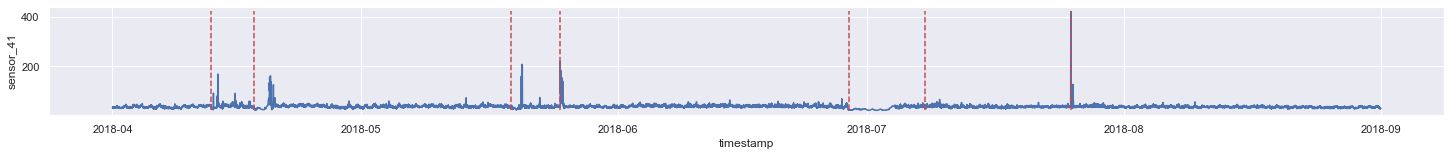

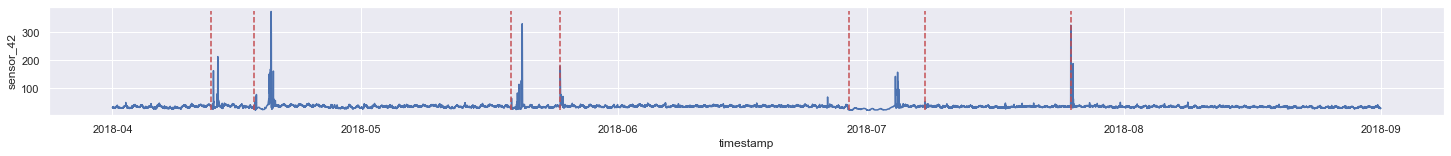

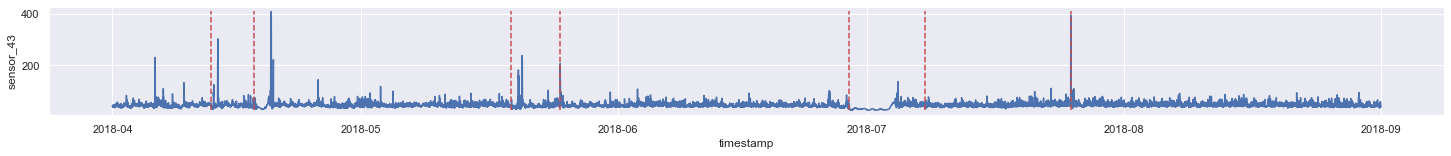

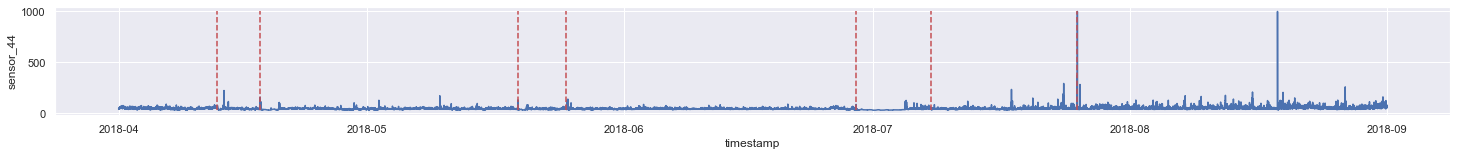

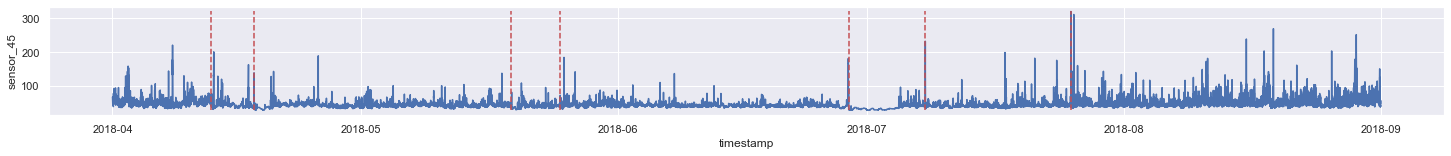

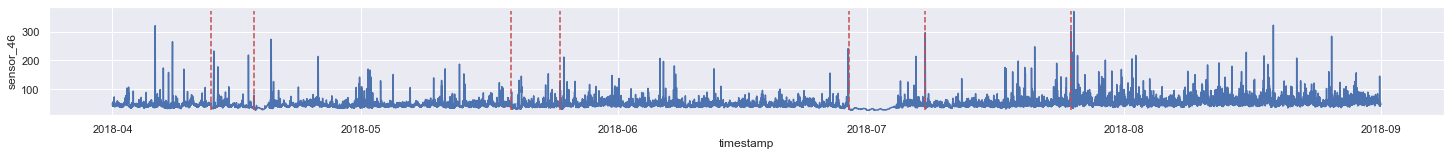

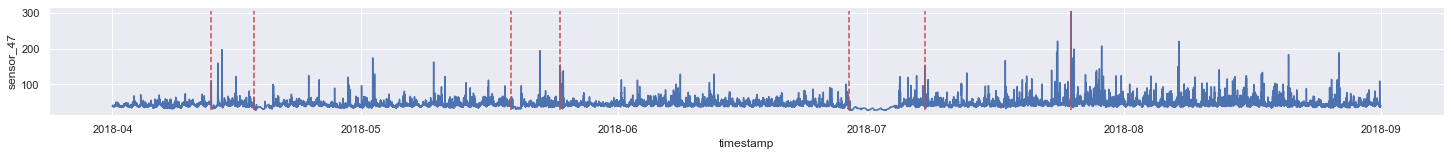

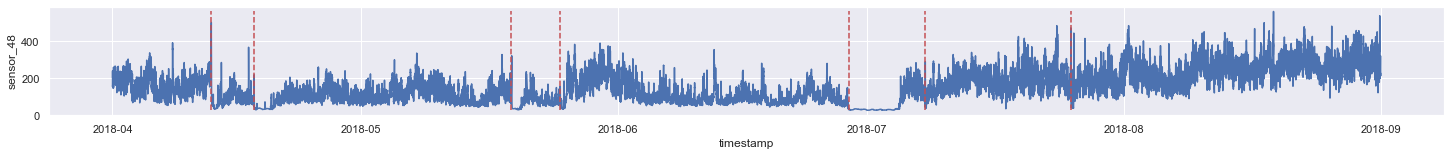

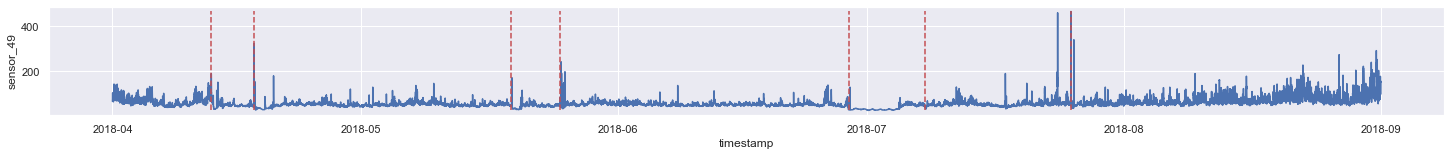

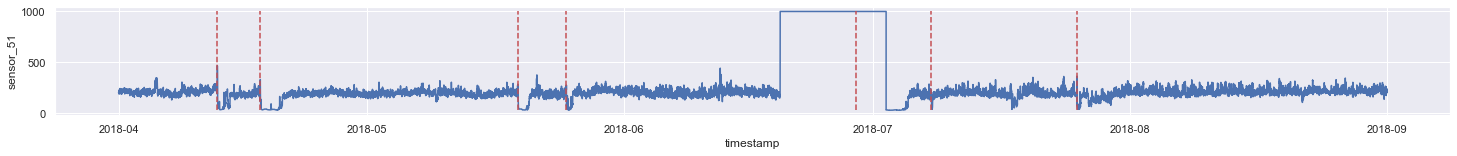

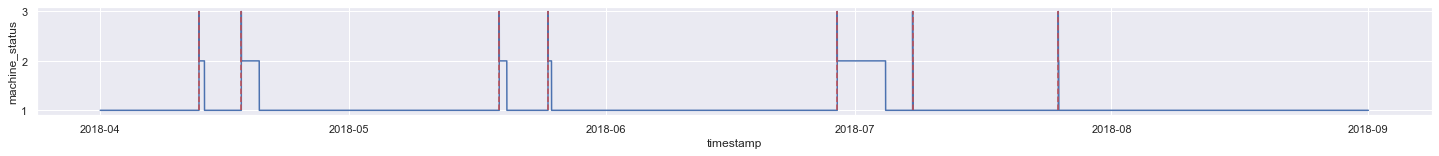

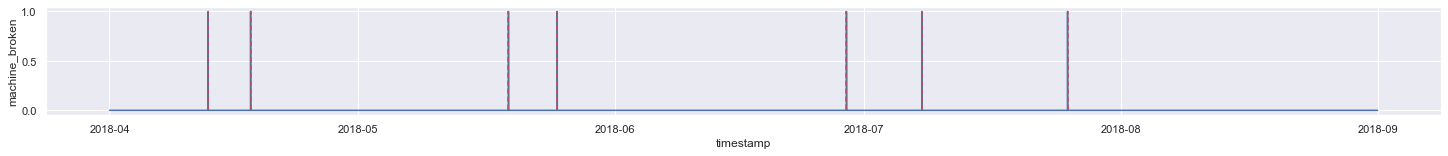

In [112]:

# show in a linegraph of each single sensor when the breakdown happend...

for column in sensor.columns:
    plt.figure(figsize=(25,2))
    sns.lineplot(data=sensor, x="timestamp", y=column)

    for timeline in sensor[sensor["machine_status"] == "BROKEN"].timestamp:
        plt.vlines(timeline, ymin=sensor[column].min(), ymax=sensor[column].max(), colors='r', linestyle="dashed")

    plt.show()

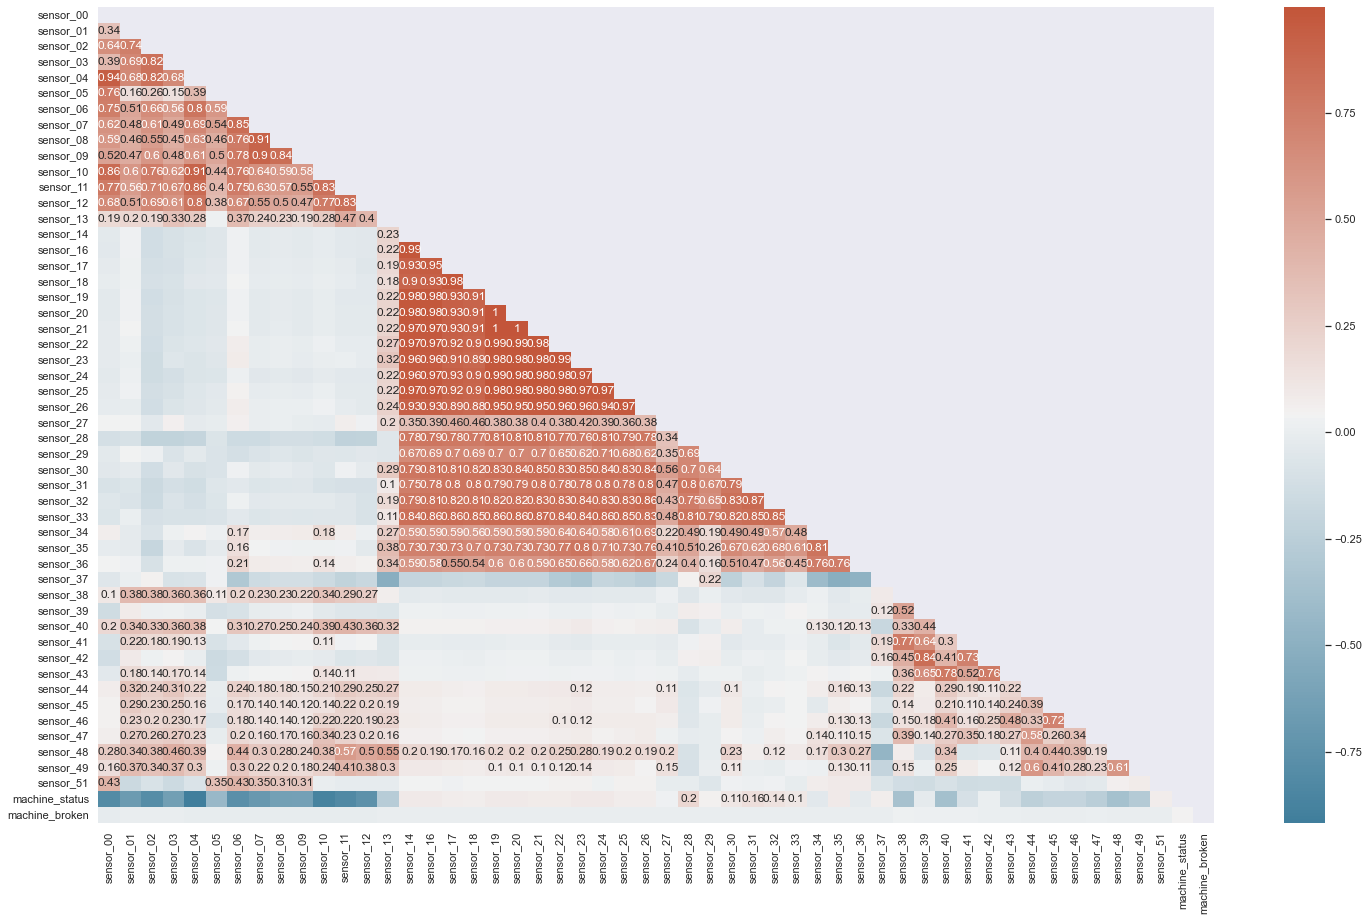

In [109]:
# Correlation between different variables
corr = sensor.corr()
f, ax = plt.subplots(figsize=(25, 15))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

for t in heatmap.texts:
    if float(t.get_text())>=0.1:
        t.set_text(t.get_text())
    else:
        t.set_text("")

In [81]:
sensor.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
count,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,220301.000000,220301.000000,220301.000000,220301.000000,220299.000000,220289.000000,220274.000000,220274.000000,220304.000000,220304.000000,220304.000000,220279.000000,220304.000000,220304.000000,220284.000000,220300.000000,220304.000000,220304.000000,220248.000000,220059.000000,220304.00000,220252.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,204937.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,41.470339,41.918319,29.136975,7.078858,376.860041,416.472892,421.127517,2.303785,590.829775,360.805165,796.225942,459.792815,922.609264,556.235397,649.144799,786.411781,501.506589,851.690339,576.195305,614.596442,863.32310,804.283915,486.405980,234.971776,427.129817,593.033876,60.787360,49.655946,36.610444,68.844530,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,202.699667
std,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,12.093519,13.056425,10.113935,6.901755,113.206382,126.072642,129.156175,0.765883,199.345820,101.974118,226.679317,154.528337,291.835280,182.297979,220.865166,246.663608,169.823173,313.074032,225.764091,195.726872,283.54476,260.602361,150.751836,88.376065,141.772519,289.385511,37.604883,10.540397,15.613723,21.371139,7.898665,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,109.588607
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,0.000000,0.000000,0.000000,0.000000,32.409550,0.000000,0.000000,0.000000,0.000000,0.000000,95.527660,0.000000,0.000000,0.000000,0.000000,43.154790,0.000000,4.319347,0.636574,0.000000,23.95833,0.240716,6.460602,54.882370,0.000000,2.260970,0.000000,24.479166,19.270830,23.437500,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.777779
25%,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,40.705260,38.856420,28.686810,1.538516,418.103250,459.453400,454.138825,2.447542,662.768975,398.021500,875.464400,478.962600,950.922400,601.151050,693.957800,790.489575,448.297950,782.682625,518.947225,627.777800,839.06240,760.607475,489.761075,172.486300,353.176625,288.547575,28.799220,45.572910,32.552080,57.812500,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,179.108800
50%,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,44.291340,45.363140,32.515830,2.929809,420.106200,462.856100,462.020250,2.533704,665.672400,399.367000,879.697600,531.855900,981.925000,625.873500,740.203500,861.869600,494.468450,967.279850,564.872500,668.981400,917.70830,878.850750,512.271750,226.356050,473.349350,709.668050,64.295485,49.479160,35.416660,66.406250,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,197.338000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,47.463760,49.656540,34.939730,12.859520,420.997100,464.302700,466.857075,2.587682,667.146700,400.088400,882.129900,534.254850,1090.

In [82]:
sensor.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL


In [137]:
machine_status = {"NORMAL":0, "RECOVERING":0, "BROKEN":1}
sensor["machine_broken"] = sensor["machine_status"].map(machine_status)
sensor_ml = sensor.copy()
sensor_ml.drop("machine_status", inplace = True, axis=1)

In [107]:

# categorize in 1 and 0 for normal+recovering and 1 broken

machine_status ={"NORMAL":1 ,"RECOVERING":2, "BROKEN":3}

sensor["machine_status"] = sensor["machine_status"].map(machine_status)


########################################################################################################
### IDEAS
- handle missing values with machine learning and below 4% with median and mean

- cluster incidents with knn + dbscan

- predict machine failure with pca/tsne and no dimension reduction

- predict machine failure with classical machine learning and lstm deeplearning model

##########################################################################################################


### Handle missing values through Median or Modus (needs to get validated...)

- use Mean if not to many outliers...
- use Median if many outliers..

In [92]:
sensor_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 52 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       220320 non-null  datetime64[ns]
 1   sensor_00       210112 non-null  float64       
 2   sensor_01       219951 non-null  float64       
 3   sensor_02       220301 non-null  float64       
 4   sensor_03       220301 non-null  float64       
 5   sensor_04       220301 non-null  float64       
 6   sensor_05       220301 non-null  float64       
 7   sensor_06       215522 non-null  float64       
 8   sensor_07       214869 non-null  float64       
 9   sensor_08       215213 non-null  float64       
 10  sensor_09       215725 non-null  float64       
 11  sensor_10       220301 non-null  float64       
 12  sensor_11       220301 non-null  float64       
 13  sensor_12       220301 non-null  float64       
 14  sensor_13       220301 non-null  flo

[]

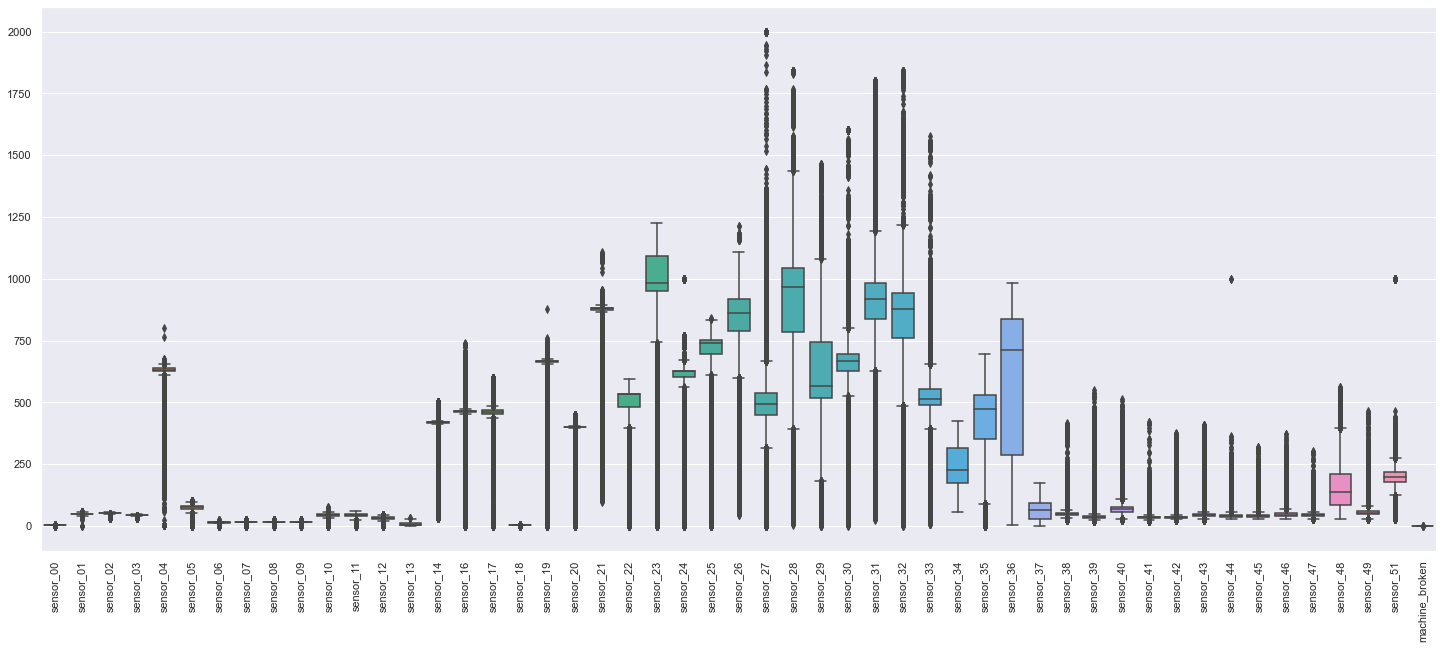

In [100]:
plt.figure(figsize=(25,10))
ax = sns.boxplot(data = sensor_ml)

labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)
plt.plot()

In [136]:
sensor_ml.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_broken
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NaN
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NaN
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NaN
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NaN
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NaN


In [141]:
#show the columns with the most outliers and fill na based on the amount of outliers

for k,v in sensor_ml.iloc[:,1:51].items():

    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(sensor)[0]

    if perc > 15:
        median = sensor_ml[k].median()
        sensor_ml[k]= sensor_ml[k].fillna(median)
    else:
        mean = sensor_ml[k].mean()
        sensor_ml[k]= sensor_ml[k].fillna(mean)


In [66]:

'''
numeric = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_51']
       
#percentage of outliers
for k,v in sensor.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(sensor)[0]

    if perc > 15:
        median = sensor[k].median()
        sensor[k]= sensor[k].fillna(median)
    else:
        mean = sensor[k].mean()
        sensor[k]= sensor[k].fillna(mean)
'''

TypeError: unsupported operand type(s) for -: 'str' and 'str'

<AxesSubplot:>

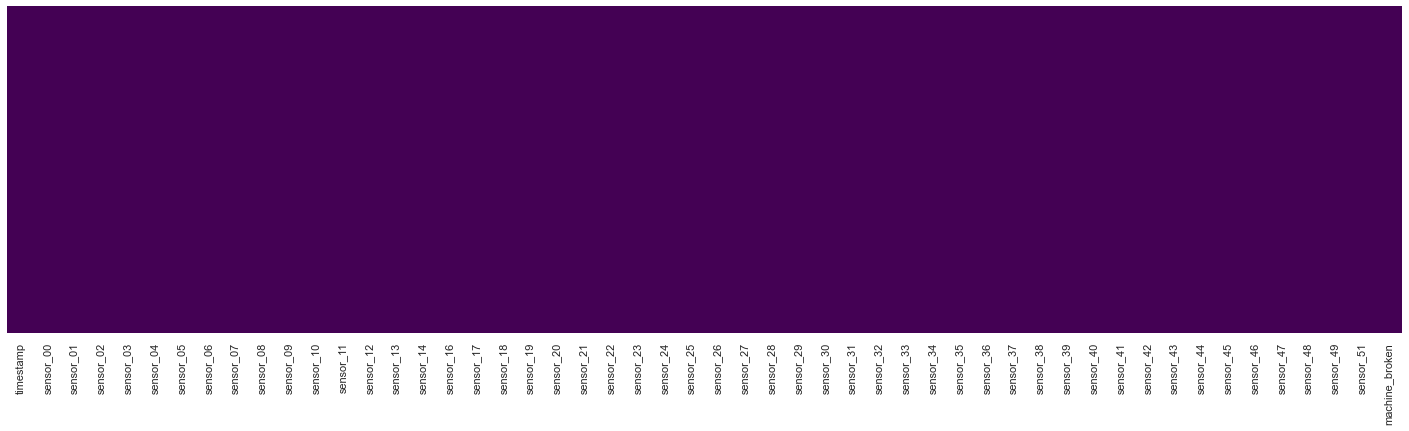

In [102]:
plt.figure(figsize=(25,6))
sns.heatmap(sensor_ml.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### LATER: Detect outliers and handle them maybe standardscale?

In [103]:
print(sensor_ml.timestamp.max()-sensor_ml.timestamp.min())

print(sensor_ml.machine_broken.value_counts())

152 days 23:59:00
0    220313
1         7
Name: machine_broken, dtype: int64


In [104]:
sensor_ml.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_broken
count,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.805117,41.470339,41.918319,29.136975,7.078858,376.864163,416.479418,421.136055,2.303833,590.835210,360.807966,796.232004,459.792815,922.609264,556.235397,649.144799,786.411781,501.506589,851.690339,576.195305,614.660868,863.323100,804.283915,486.405980,234.971776,427.129817,593.033876,60.787360,49.655946,36.610444,68.844530,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,202.699667,0.000032
std,0.402564,3.293904,3.666662,2.418782,144.017702,17.297501,2.140046,2.173755,2.013639,2.070429,12.092997,13.055862,10.113499,6.901457,113.201774,126.064972,129.144042,0.765810,199.339602,101.970944,226.672202,154.513958,291.824683,182.291359,220.847121,246.652412,169.817006,313.062664,225.727198,195.619850,283.534464,260.562141,150.746362,88.372856,141.767371,289.375003,37.603518,10.539752,15.612766,21.369829,7.898181,10.258892,11.043727,11.575646,12.836733,15.640325,10.441797,82.239917,19.142425,105.693568,0.005637
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,0.000000,0.000000,0.000000,0.000000,32.409550,0.000000,0.000000,0.000000,0.000000,0.000000,95.527660,0.000000,0.000000,0.000000,0.000000,43.154790,0.000000,4.319347,0.636574,0.000000,23.958330,0.240716,6.460602,54.882370,0.000000,2.260970,0.000000,24.479166,19.270830,23.437500,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.777779,0.000000
25%,2.419155,46.310760,50.390620,42.838539,626.620400,69.977213,13.346350,15.856480,15.183740,15.053530,40.705417,38.857022,28.687178,1.538652,418.103775,459.455000,454.141875,2.447574,662.769575,398.021800,875.465450,478.942500,950.919700,601.149500,693.932600,790.343525,448.299675,782.685650,518.964700,628.240700,839.062400,760.703950,489.753000,172.486475,353.182075,288.559000,28.803398,45.572910,32.552080,57.812500,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,180.555600,0.000000
50%,2.455556,48.133678,51.649300,44.227428,632.638916,75.576145,13.628470,16.167530,15.451390,15.082470,44.290480,45.362290,32.515630,2.930587,420.106200,462.856100,462.020250,2.533704,665.672400,399.367000,879.697600,531.854100,981.924500,625.872650,740.199250,861.831750,494.475250,967.231500,564.894700,668.981400,917.708300,878.807600,512.267800,226.367700,473.340800,709.637350,64.291375,49.479160,35.416660,66.406250,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,199.942100,0.000000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.911770,14.539930,16.427950,15.697340,15.118630,47.463485,49.656238,34.939455,12.859337,420.997000,

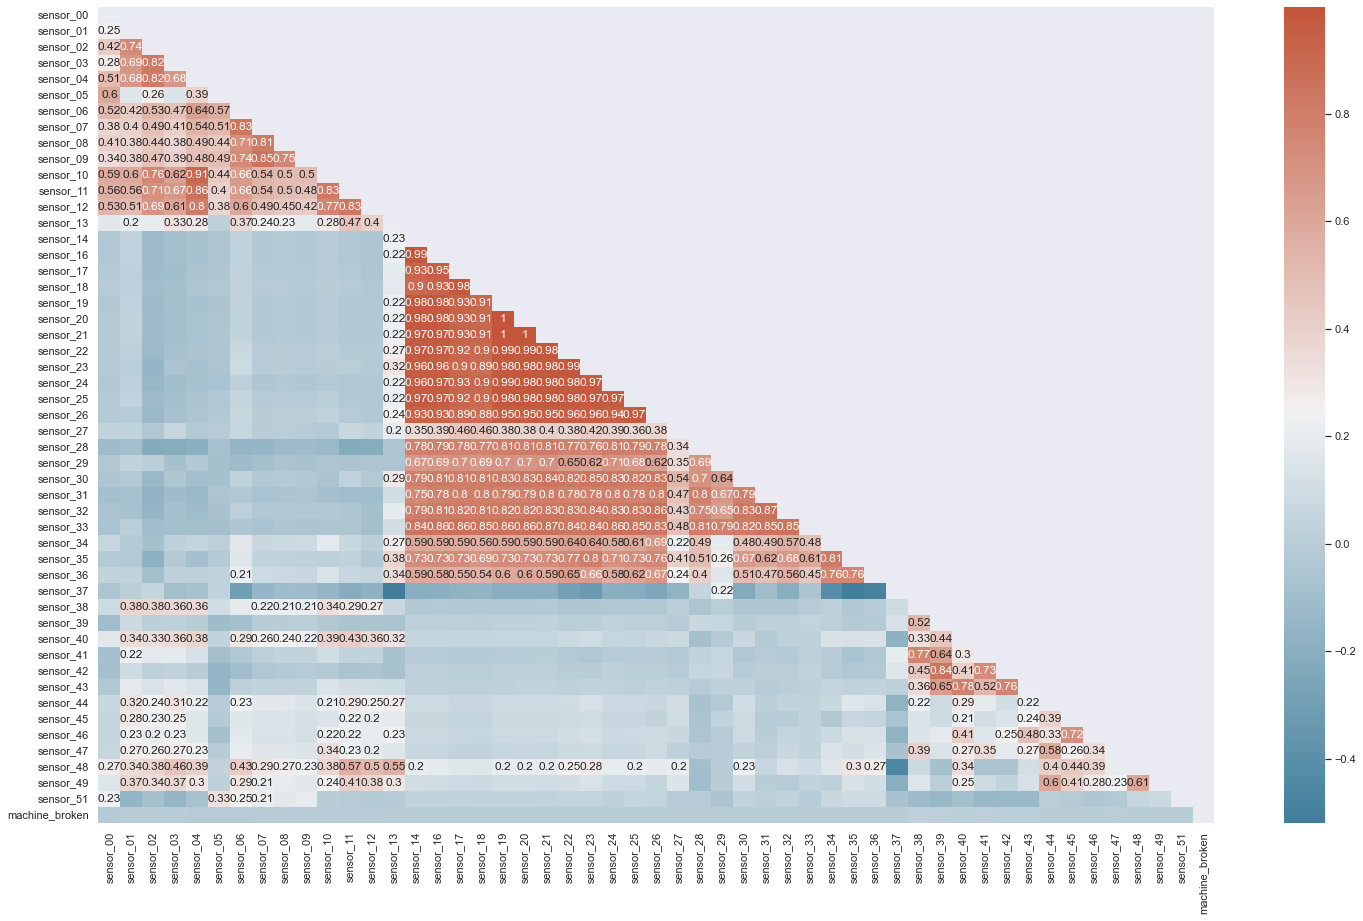

In [106]:
# Correlation between different variables
corr = sensor_ml.corr()
f, ax = plt.subplots(figsize=(25, 15))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

for t in heatmap.texts:
    if float(t.get_text())>=0.2:
        t.set_text(t.get_text())
    else:
        t.set_text("")

In [12]:
sensor.items()

<generator object DataFrame.items at 0x000002CC2906EE40>

### EDA
#### heatmap, etc

In [13]:
sensor.iloc[:,1:52]

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556
1,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,30.468750,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,30.468750,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,30.989580,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,30.468750,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,30.208332,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,29.947920,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,29.947916,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN


In [113]:
#percentage of outliers
for k,v in sensor_ml.iloc[:,1:52].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(sensor)[0]
    print("%s Outliers = %.2f%%" % (k, perc))

sensor_00 Outliers = 6.42%
sensor_01 Outliers = 6.12%
sensor_02 Outliers = 7.03%
sensor_03 Outliers = 4.87%
sensor_04 Outliers = 12.37%
sensor_05 Outliers = 8.79%
sensor_06 Outliers = 5.33%
sensor_07 Outliers = 5.58%
sensor_08 Outliers = 7.17%
sensor_09 Outliers = 31.21%
sensor_10 Outliers = 8.54%
sensor_11 Outliers = 8.11%
sensor_12 Outliers = 13.02%
sensor_13 Outliers = 0.00%
sensor_14 Outliers = 26.40%
sensor_16 Outliers = 22.16%
sensor_17 Outliers = 17.22%
sensor_18 Outliers = 17.20%
sensor_19 Outliers = 26.37%
sensor_20 Outliers = 27.04%
sensor_21 Outliers = 25.45%
sensor_22 Outliers = 12.68%
sensor_23 Outliers = 11.89%
sensor_24 Outliers = 14.08%
sensor_25 Outliers = 12.93%
sensor_26 Outliers = 12.67%
sensor_27 Outliers = 14.87%
sensor_28 Outliers = 12.55%
sensor_29 Outliers = 12.00%
sensor_30 Outliers = 16.89%
sensor_31 Outliers = 14.80%
sensor_32 Outliers = 12.16%
sensor_33 Outliers = 13.62%
sensor_34 Outliers = 0.00%
sensor_35 Outliers = 4.62%
sensor_36 Outliers = 0.00%
sensor

In [159]:
#splitting into train and test data but with an order in time 
last_40percent = round(len(sensor_ml) - len(sensor_ml)*0.4)
train = sensor_ml.iloc[:last_40percent, :]
test = sensor_ml.iloc[last_40percent:, :]

In [160]:
#check if test data has broken values
test[test['machine_broken']==1]

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_broken
141131,2018-07-08 00:11:00,0.001968,45.138890,52.90799,45.35590,500.000000,1.40131,0.028935,0.036169,0.036169,0.007234,25.97765,23.97027,19.99560,11.07640,421.6618,464.8507,470.9483,2.632338,669.1102,399.5446,880.8264,536.3282,1091.493,628.2361,759.8998,946.8455,509.9858,1042.829,562.6080,668.9814,1037.5000,947.3692,517.4770,287.9145,575.3565,616.8983,30.04753,48.69791,31.51042,39.32291,35.41666,32.81250,36.19791,37.32639,35.30093,38.19444,43.40278,99.53703,44.84954,174.7685,1
166440,2018-07-25 14:00:00,2.318808,45.833332,52.99479,43.88021,420.503448,72.52040,14.185470,16.247110,15.697340,15.053530,36.71748,50.04619,30.74288,12.21786,420.8600,463.5181,455.2702,2.468381,665.9402,399.0930,880.8410,531.8727,1093.579,626.4651,740.6738,981.4561,490.7728,1023.166,551.2756,703.7037,971.8749,1013.3760,546.6656,363.0320,522.5594,812.8298,44.77601,50.00000,39.06250,102.86460,35.41666,36.45833,51.30208,52.10200,52.66204,67.12963,43.98148,230.32410,69.73380,205.7292,1


In [166]:
#usful columns
sensor_col  = train.iloc[:, 1:51]
broken_rows = train[train['machine_broken']==1]
normal_recovery_rows = train[train['machine_broken']==0]
machine_status_col = train['machine_broken']

In [168]:
'''
for sensor in sensor_col:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(normal_recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5)
    plot = plt.plot(train[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=14)
    plot = plt.title(sensor)
    plt.xlim((-1000,177000))
    plt.show()
'''

"\nfor sensor in sensor_col:\n    plot = plt.figure(figsize=(22,1))\n    plot = plt.plot(normal_recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5)\n    plot = plt.plot(train[sensor], color='grey')\n    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=14)\n    plot = plt.title(sensor)\n    plt.xlim((-1000,177000))\n    plt.show()\n"

In [230]:
#get only the numerical values and the target value
X_cols = train.iloc[:,1:-1].columns
X_train = train.iloc[:,1:-1].copy()
y_train = train['machine_broken']

X_test = test.iloc[:,1:-1].copy()
y_test = test['machine_broken']

In [228]:
X_train.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889
1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889
2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037
3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250
4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889


In [177]:
#for kmeans normalize data
from sklearn.preprocessing import Normalizer

normalize = Normalizer()
X_train_KM = normalize.fit_transform(X_train)
X_train_KM = pd.DataFrame(X_train_KM)
X_train_KM.columns = X_cols

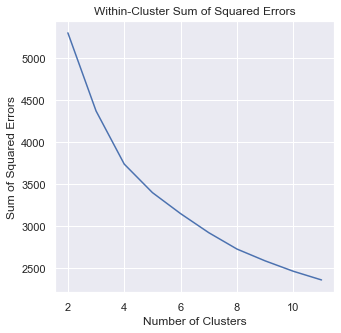

In [180]:
error = []
K = range(2,12)
for k in K:
    kmeans = KMeans(n_clusters = k,
                    max_iter = 500,
                    init = 'k-means++',
                    n_init = 20,
                    random_state = 42)
    kmeans_fit = kmeans.fit(X_train_KM)
    error.append(kmeans.inertia_)

plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Within-Cluster Sum of Squared Errors')
plt.plot(K,error)

In [181]:
# find best KMeans model parameters based on the training data
parameters = {'algorithm' : ['auto', 'elkan'], 
              'n_clusters':[3,4,5]}

model_results = {}
ytrue = pd.DataFrame(y_train, columns=['machine_broken'])
for alg in parameters['algorithm']: 
    for n in parameters['n_clusters']:
        kmeans = KMeans(n_clusters = n,
                        algorithm = alg,
                        max_iter = 500, 
                        init = 'k-means++', 
                        random_state = 42)
        kmeans.fit(X_train_KM)
        ypred = kmeans.predict(X_train_KM)  ##überprüfen

In [183]:
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))

0.14168784797869766
[[18730 52392 50072  3375  7618]
 [    0     0     4     0     1]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]]


In [184]:
# train kmeans model with best parameters
kmeans = KMeans(n_clusters = 3, 
                algorithm = 'auto',
                init = 'k-means++',
                max_iter = 500,
                random_state = 42)
kmeans.fit(X_train_KM)

################################### End of Kmeans  ###################################

KMeans(max_iter=500, n_clusters=3, random_state=42)

In [195]:
#Multiple ML to find a promissing ml algorithm

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import auc, plot_confusion_matrix, accuracy_score,roc_auc_score , confusion_matrix, mean_squared_error, classification_report, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [196]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "XGBoost",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    xgb.XGBClassifier(learning_rate =  0.1, max_depth = 2, n_estimators = 50),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [233]:
#for kmeans normalize data
from sklearn.preprocessing import Normalizer

normalize = Normalizer()
X_train_ML = normalize.fit_transform(X_train)
X_train_ML = pd.DataFrame(X_train_KM)
X_train_ML.columns = X_cols

X_test_ML = normalize.fit_transform(X_test)
X_test_ML = pd.DataFrame(X_test_ML)
X_test_ML.columns = X_cols

In [235]:
scores = []

for name, clf in zip(names, classifiers):
    print(name)
    clf.fit(X_train_ML, y_train)
    y_pred = clf.predict(X_test_ML)
    print(y_pred)
    score = f1_score(y_test, y_pred, average='micro')
    print(score)
    scores.append(score)

Nearest_Neighbors
[0 0 0 ... 0 0 0]
0.9999773057371096
Linear_SVM
[0 0 0 ... 0 0 0]
0.9999773057371096
Polynomial_SVM
[0 0 0 ... 0 0 0]
0.9999773057371096
RBF_SVM
[0 0 0 ... 0 0 0]
0.9999773057371096
XGBoost


c:\Users\timon\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:01:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 0 0 ... 0 0 0]
0.9999773057371096
Gradient_Boosting
[0 0 0 ... 0 0 0]
0.9998411401597677
Decision_Tree
[0 0 0 ... 0 0 0]
0.9998524872912128
Extra_Trees
[0 0 0 ... 0 0 0]
0.9999773057371096
Random_Forest
[0 0 0 ... 0 0 0]
0.9999773057371096
Neural_Net
[0 0 0 ... 0 0 0]
0.9999773057371096
AdaBoost
[0 0 0 ... 0 0 0]
0.9999773057371096
Naive_Bayes
[0 0 0 ... 0 0 0]
0.9092456427015251
QDA


c:\Users\timon\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[0 0 0 ... 0 0 0]
0.9999773057371096
SGD
[0 0 0 ... 0 0 0]
0.9999773057371096


In [240]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.999977
1,Linear_SVM,0.999977
2,Polynomial_SVM,0.999977
3,RBF_SVM,0.999977
4,XGBoost,0.999977
5,Gradient_Boosting,0.999841
6,Decision_Tree,0.999852
7,Extra_Trees,0.999977
8,Random_Forest,0.999977
9,Neural_Net,0.999977


#### Need to follow a nother approach to predict machine failure since it is only happening rarley

#### Rather Predict with an LSTM Model how the ideal next day looks like and compare it with the actual sensor data if a bigger deviation arises you could create an alarm...

#### For this you will have to find a few very significant sensor which indicate machine failure

### 1. PCA & tsne

In [241]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D

In [275]:
pca_df = sensor_ml.iloc[:,1:-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_df)

pca = PCA(n_components=5)

x_pca = pca.fit(X_scaled)

In [276]:
x_pca_2 = pca.fit_transform(X_scaled)

In [277]:
print(x_pca.explained_variance_ratio_)

[0.349478 0.186837 0.086101 0.055038 0.042543]


In [278]:
pca_dataframe = pd.DataFrame(data = x_pca_2, columns=["pca1", "pca2","pca3", "pca4", "pca5" ])

In [279]:
print("Before PCA:")
print( pca_df.shape)
print("After PCA:")
print(pca_dataframe.shape)

Before PCA:
(220320, 50)
After PCA:
(220320, 5)


#### from here on do further ML Projects

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


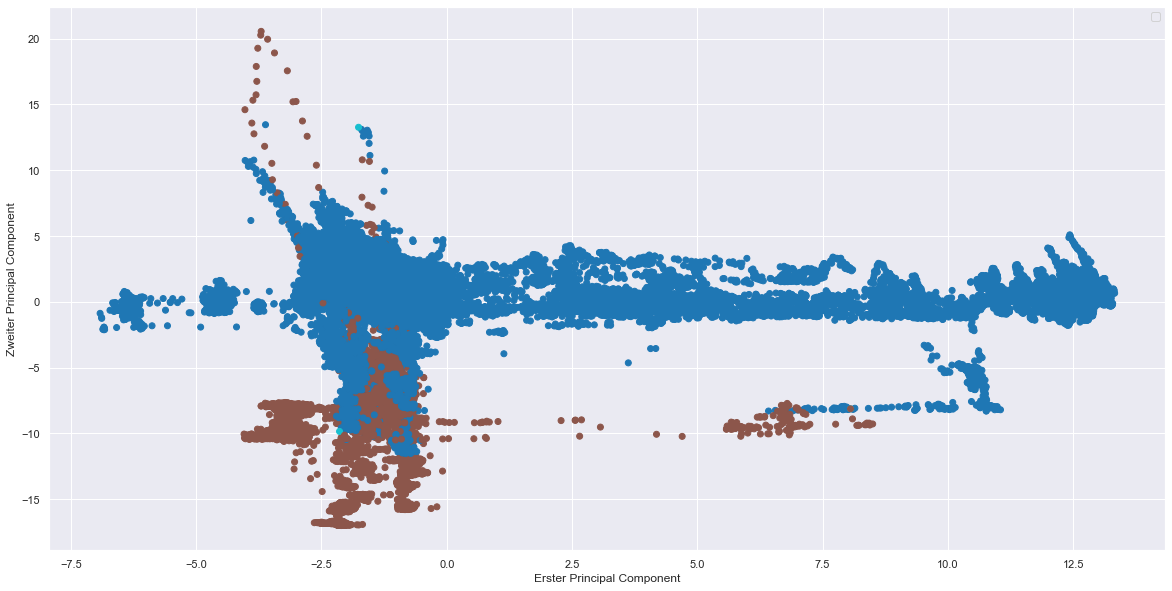

In [104]:
plt.figure(figsize=(20,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=sensor["machine_status"],cmap="tab10")
plt.xlabel('Erster Principal Component')
plt.ylabel('Zweiter Principal Component')
plt.legend()

<AxesSubplot:>

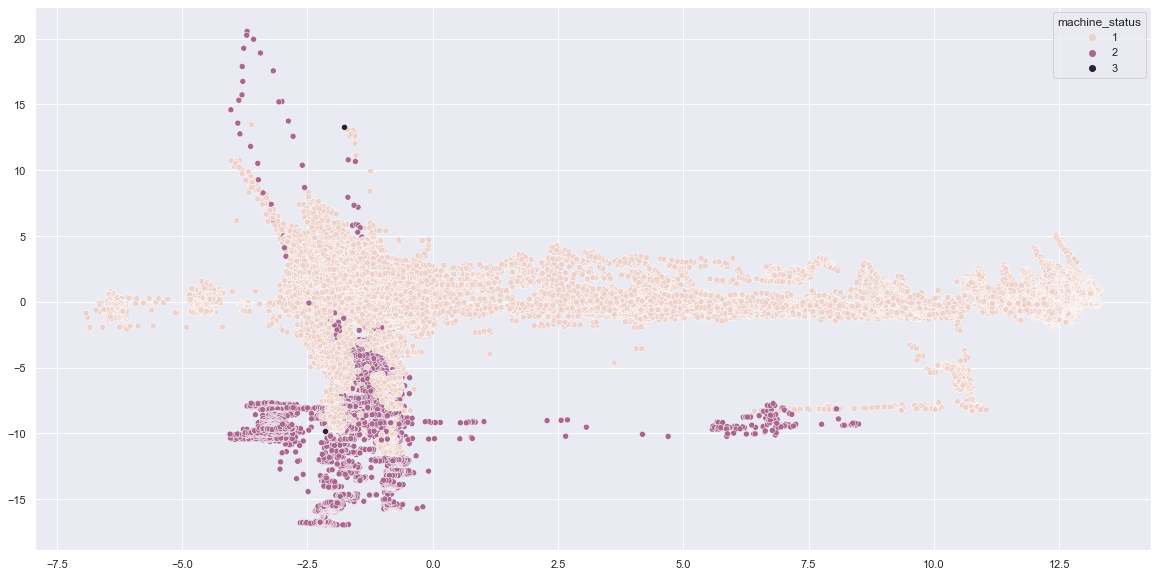

In [108]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = x_pca, x = x_pca[:,0], y = x_pca[:,1], hue=sensor["machine_status"], legend = machine_status)

In [88]:
sensor.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,1
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,1
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,1
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,1
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,1


<AxesSubplot:>

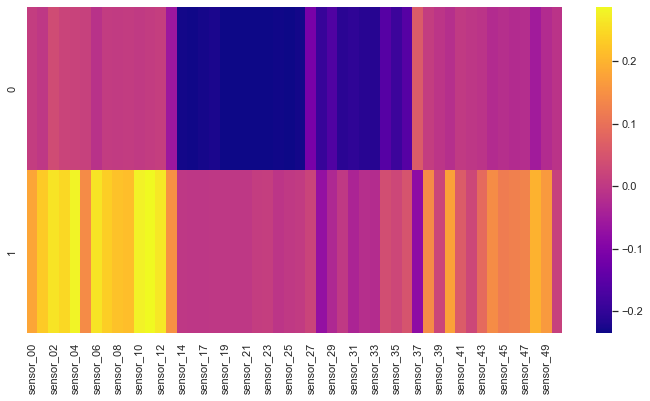

In [109]:
df_comp = pd.DataFrame(pca.components_,columns=X.iloc[:,1:].columns)

plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [110]:
#TSNE dimension reduction

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X.iloc[:,1:])


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 220320 samples in 0.008s...
[t-SNE] Computed neighbors for 220320 samples in 724.255s...
[t-SNE] Computed conditional probabilities for sample 1000 / 220320
[t-SNE] Computed conditional probabilities for sample 2000 / 220320
[t-SNE] Computed conditional probabilities for sample 3000 / 220320
[t-SNE] Computed conditional probabilities for sample 4000 / 220320
[t-SNE] Computed conditional probabilities for sample 5000 / 220320
[t-SNE] Computed conditional probabilities for sample 6000 / 220320
[t-SNE] Computed conditional probabilities for sample 7000 / 220320
[t-SNE] Computed conditional probabilities for sample 8000 / 220320
[t-SNE] Computed conditional probabilities for sample 9000 / 220320
[t-SNE] Computed conditional probabilities for sample 10000 / 220320
[t-SNE] Computed conditional probabilities for sample 11000 / 220320
[t-SNE] Computed conditional probabilities for sample 12000 / 220320
[t-SNE] Computed conditional prob

<AxesSubplot:>

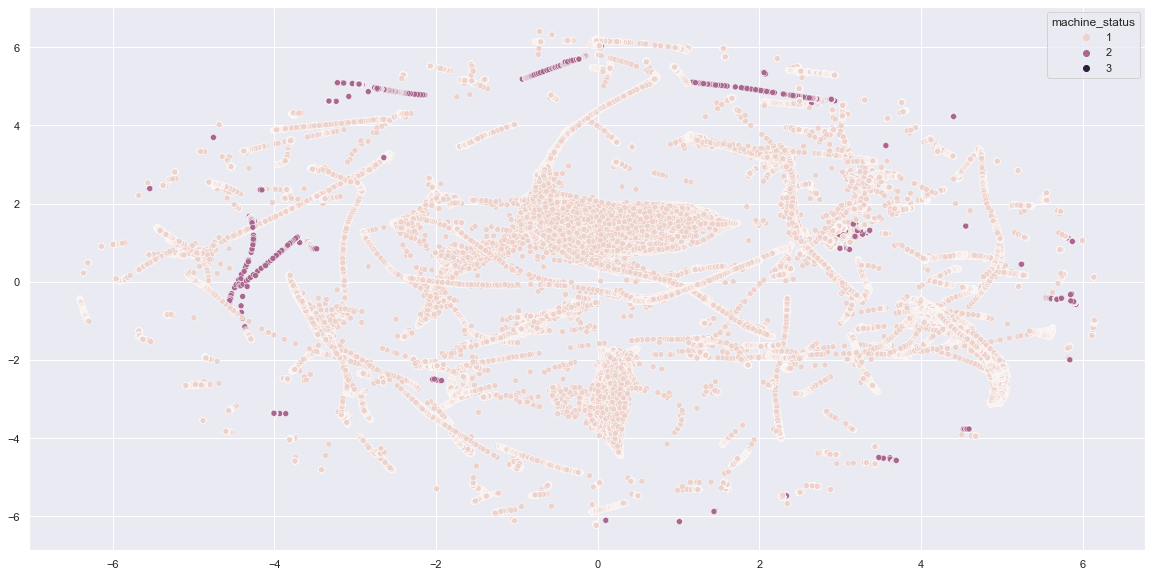

In [113]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = tsne_results, x = tsne_results[:,0], y = tsne_results[:,1], hue=sensor["machine_status"])